## Repaso

¿Qué aprendimos hasta ahora?

Primer clase:
- **Reportar un intervalo:** no hay que reportar un valor único o puntual.
- **Repetir las mediciones:** para evaluar si vuelve a estar dentro del mismo intervalo.
- **Mejorar la metodología**: para mejorar la precisión de la medición (ejemplo diametro).
- **Describir la metodologia**: para poder repetir y reproducir el experimento.

Segunda clase:
- **Propagar intervalos:** con la formula de propagación de errores, para calcular magnitudes derivadas a partir de otras mediciones
- **Comparar intervalos:** para evaluar si dos mediciones son compatibles, "dan lo mismo".
- **"A más mediciones", menor intervalo:** medir más reduce el error, el intervalo de confianza.

# Experimento estocástico: midiendo con un cronómetro

Si medimos una vez cno el cronómetro, pensaríamos que el error de la medición es $0.01$s.

Y eso...

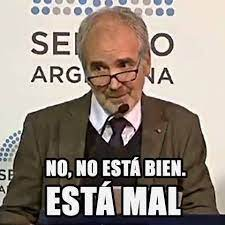

**Es fundamental repetir el experimento.**

Ahí vemos que las distintas mediciones **del mismo fenómeno** no son compatibles.

Estamos subestimando el error, la incerteza de nuestras mediciones.

Entonces, ¿qué valor reportarían y con qué error?

## Analizando mediciones

Para analizar las mediciones, usaremos dos paquetes de Python fundamentales para el análisis de datos:

- `numpy`: para hacer cálculos con conjuntos de números
- `matplotlib`: para realizar gráficos

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc("figure", dpi=100)  # Cambia la resolución por defecto de las figuras

Medimos y guardamos las mediciones en un archivo `.csv` (comma-separated values).

Importamos las mediciones.

In [114]:
# Importar mediciones y guardar en variable datos
file = "/home/maurosilber/Dropbox/UBA/Labo1/metronomo/8_Grillo.txt"

datos = np.loadtxt(file)

Además, voy a simular las (otras) mediciones de Franco, que usó un programa de análisis de audio.

In [51]:
datos_simulados = np.round(np.random.normal(loc=1.09, scale=0.02, size=20), 2)
datos_simulados[0] = 0.8

Veamoslas:

In [52]:
datos_simulados

array([0.8 , 1.08, 1.1 , 1.1 , 1.09, 1.06, 1.09, 1.1 , 1.1 , 1.1 , 1.09,
       1.08, 1.07, 1.08, 1.09, 1.08, 1.11, 1.08, 1.1 , 1.1 ])

¿Son razonables estas mediciones?

Es dificil contestar esta pregunta a partir de una lista de números.

Una mejor forma es realizando un gráfico.

## Graficando mediciones

Graficar es **lo primero que tienen que hacer al analizar un conjunto de datos**.

Hay muchos tipos de gráficos. ¿Cuál hacemos?

¿Para qué hacemos un gráfico?

Para **entender las mediciones**, y convencernos, por ejemplo, de que medimos bien.

Además, para **convencer a otres** de nuestros resultados.

Entonnces, es importante que el gráfico esté bien hecho y sea claro.

### Ejemplos

Ejemplo de hoy en Twitter:

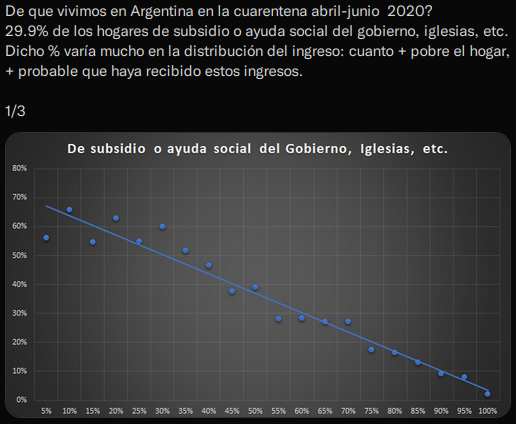

¿Qué es lo que está mal?

Otro ejemplo de Twitter:

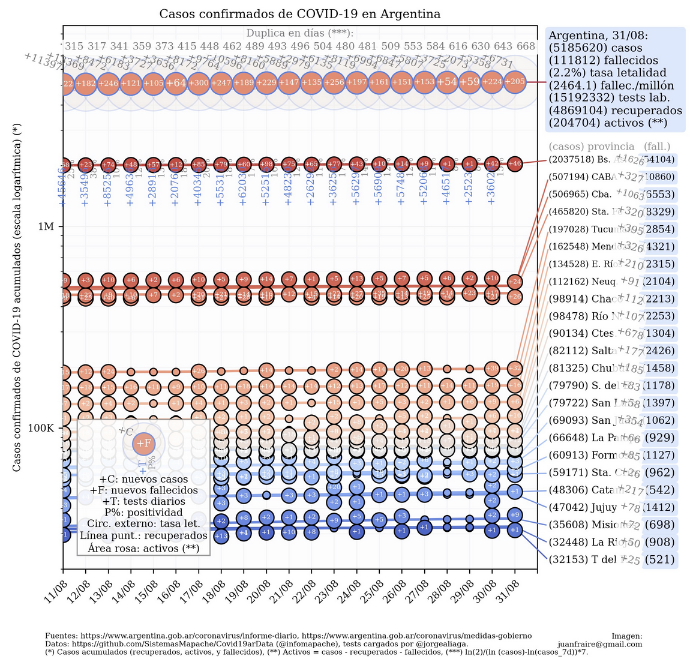

¿Qué es lo que está mal?

### Line plot o gráfico de linea

Podemos empezar haciendo un gráfico de linea (o *line plot*) con `plt.plot`

*Nota: `plt.plot` es la función más básica, pero está hecha de manera super confusa (para Python).*

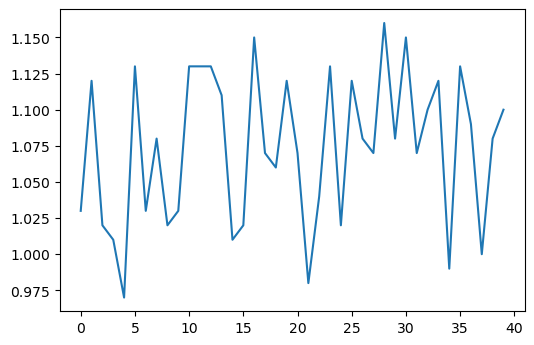

In [53]:
plt.plot(datos)

¿Qué hizo esta función? ¿Qué son los ejes?

En general, esta **no** es una buena manera de mostrar estos datos.

Este tipo de gráficos da a entender que si se realizara una medición entre dos puntos, esta caería sobre la linea que los une.

Es mejor reservar el gráfico de linea a gráficos de **modelos teóricos**, en lugar de mediciones experimentales.

### Scatter plot o gráfico de dispersión

Otra opción es hacer un *scatter plot*, que grafica puntos $(x, y)$, pero sin unirlos con una linea:

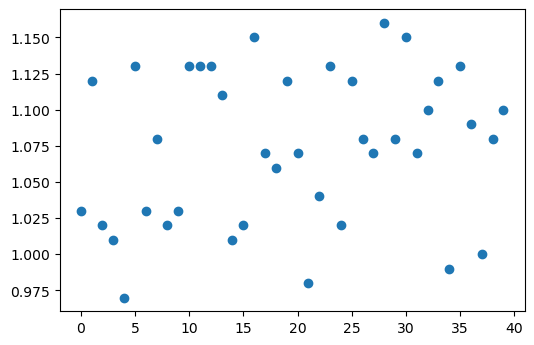

In [62]:
x = np.arange(datos.size)
plt.scatter(x, datos)

Se puede hacer así:

Text(0, 0.5, 'Periodo [s]')

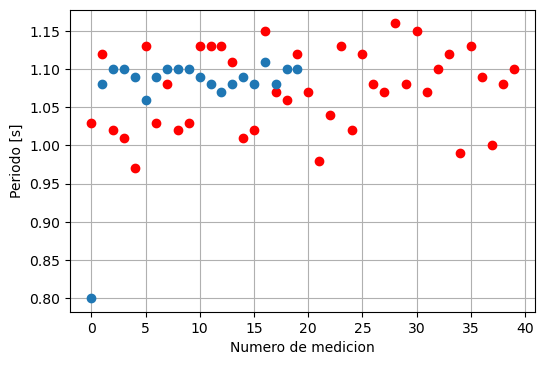

In [68]:
plt.plot(datos, "o", color="r")
plt.plot(datos_simulados, "o")
plt.grid()
plt.xlabel("Numero de medicion")
plt.ylabel("Periodo [s]")

### Con barras de error

Cuando sabemos cuál es el error de cada punto, se suele hacer un gráfico con barras de error con la función `plt.errorbar`:

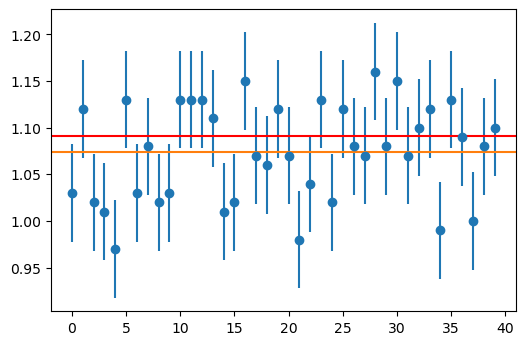

In [123]:
x = np.arange(datos.size)

plt.errorbar(x, datos, yerr=datos.std(), fmt="o")
plt.axhline(datos.mean(), color="C1")
plt.axhline(1.091, color="r")

In [118]:
datos.std()

0.05209066615047266

In [122]:
datos.mean() - 1.091

-0.017249999999999988

In [120]:
datos.std() / np.sqrt(datos.size)

0.008236257493546444

### Histograma

Un histograma es una **representación de la distribución de los datos**.

Nos permite ver la **densidad de datos**.

(array([[ 3.,  3.,  7.,  1.,  5.,  5.,  3., 10.,  3.],
        [ 3.,  3.,  7.,  1.,  5.,  5.,  3., 10.,  3.]]),
 array([0.97      , 0.99111111, 1.01222222, 1.03333333, 1.05444444,
        1.07555556, 1.09666667, 1.11777778, 1.13888889, 1.16      ]),
 <a list of 2 BarContainer objects>)

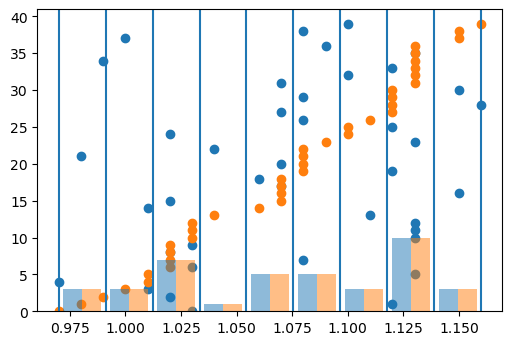

In [80]:
# Rotar scatter plot
# Dividir en bins
# Superponer histograma (alpha)
# Doble eje-y
# Nombrar ejes
# Grilla
# Ordenar x (nueva variable)
# Duplicar scatter e hist

x = np.arange(datos.size)

datos_o = np.sort(datos)

plt.scatter(datos, x)
plt.scatter(datos_o, x)

bins = np.linspace(datos.min(), datos.max(), 10)
for b in bins:
    plt.axvline(b)
    
plt.hist([datos, datos_o], bins=bins, alpha=0.5)

Pero no nos permite ver tendencias temporales en los datos.

En general, **no nos permite ver relaciones entre dos variables**.

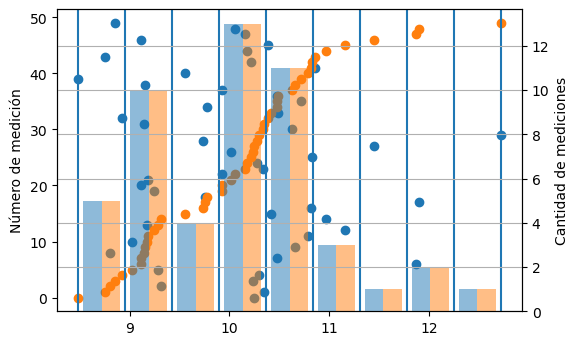

In [43]:
x = np.random.normal(loc=10, scale=1, size=50)
x_sort = np.sort(x)
y = np.arange(x.size)

plt.scatter(x, y)
plt.scatter(x_sort, y)
plt.ylabel("Número de medición")

bins = np.linspace(x.min(), x.max(), 10)
for b in bins:
    plt.axvline(b)

plt.twinx()
plt.hist([x, x_sort], bins=bins, alpha=0.5)
plt.ylabel("Cantidad de mediciones")
plt.grid()

In [ ]:
plt.hist

#### Ancho de *bin*

A diferencia de los gráficos anteriores, hacer un histograma requiere de una elección *arbitraria* del ancho de los intervalos.

En particular, con pocos datos, es más díficil elegir un número de *bins* bueno. Generemos más datos para ver como influye variar la cantidad de *bins*:

In [89]:
np.random.rand(10)

array([0.74341918, 0.28331552, 0.0375008 , 0.05119676, 0.42958812,
       0.53398407, 0.09591128, 0.96926714, 0.17224598, 0.11789608])

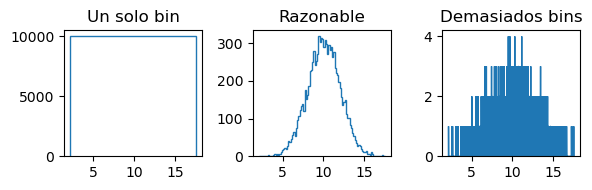

In [90]:
x = np.random.normal(loc=10, scale=2, size=10_000)

fig, axes = plt.subplots(1, 3, figsize=(6, 2))

bins = {"Un solo bin": 1, "Razonable": np.sqrt(x.size), "Demasiados bins": 10 * x.size}

for ax, (title, num_bins) in zip(axes, bins.items()):
    ax.hist(x, bins=int(num_bins), histtype="step")
    ax.set(title=title)

fig.tight_layout()

In [91]:
import ipywidgets


def plot_histogram(num_bins=1):
    plt.hist(x, bins=num_bins, histtype="step")


N = int(x.size ** 0.5)
ipywidgets.interact(plot_histogram, num_bins=(1, 3 * N, N // 20))

interactive(children=(IntSlider(value=1, description='num_bins', max=300, min=1, step=5), Output()), _dom_clas…

<function __main__.plot_histogram(num_bins=1)>

#### Reglas automáticas

Hay diversas reglas automáticas de selección de bins, como la regla de Sturges, que mencionamos en la primer clase.

Cada una asume diferentes hipótesis sobre la distribución de los datos.

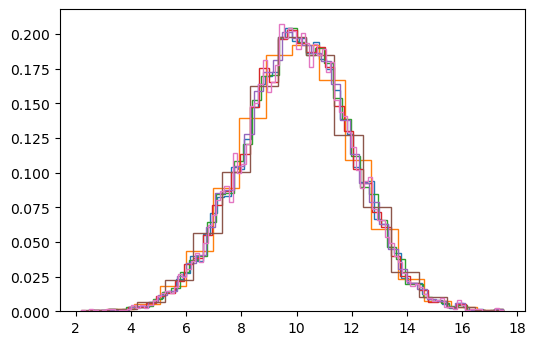

In [107]:
# Graficar las reglas automáticas
for regla in ('fd', 'doane',
    'scott', 'stone', 'rice', 'sturges', 'sqrt'):
    plt.hist(x, bins=regla, histtype="step", density=True)

Ninguna es infalible, pero son mejores que quedarse con el valor por defecto `bins=10`.

**Quedarse con el valor por defecto (casi) seguro está mal.**

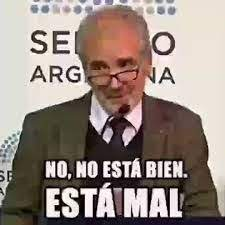

#### Normalización

Por defecto, un histograma cuenta cuantas muestras cayeron en cada *bin*.

Pero, si queremos **comparar** histogramas con **diferente cantidad de datos totales**, necesitamos normalizar.

In [98]:
# Grafiquemos histogramas de subconjuntos de las muestras
x[:10]

array([ 9.75450267, 10.46694972, 10.42104784, 11.4902763 , 10.75242662,
       10.96425845, 11.50028762, 12.26970252,  8.95496807,  8.58573779])

##### Normalización por frecuencia

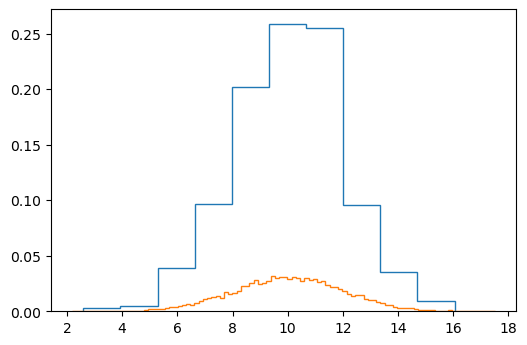

In [103]:
# Normalizar por frecuencia
bins = np.linspace(x.min(), x.max(), 10)

plt.hist(x[:1000], bins=10, weights=np.full(1000, 1/1000), histtype="step")
plt.hist(x[:10000], bins=100, weights=np.full(10000, 1/10000), histtype="step");

In [105]:
np.full(5, 0.2)

array([0.2, 0.2, 0.2, 0.2, 0.2])

##### Normalización por area

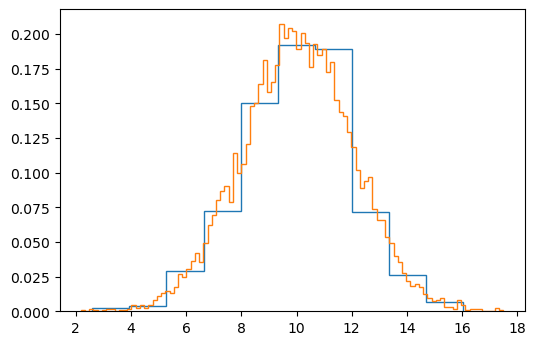

In [106]:
# Normalizar por area
plt.hist(x[:1000], bins=10, density=True, histtype="step")
plt.hist(x[:10000], bins=100, density=True, histtype="step");

## Resumen hasta acá

Hay que gráficar (bien):

1. Para **entender** nuestras mediciones
2. Para **explicar** nuestros resultados

**Line o scatter plots** nos permiten ver **tendencias**, o relaciones entre variables.

**Histogramas** nos permiten ver **distribuciones** de una variable.

### Resumiendo un histograma

Si realizamos muchos experimentos, no podemos mostrar un histograma para cada uno.

Para 2 o 3 experimentos sí, pero para 100 no.

¿Podemos **resumir** aún más los datos?

En particular, si tuviesen que resumir el siguiente histograma de manera textual, ¿cómo la describirian?

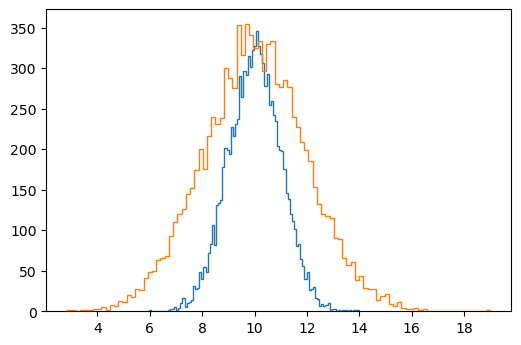

In [108]:
plt.hist(np.random.normal(loc=10, scale=1, size=10_000), bins="sqrt", histtype="step");
plt.hist(np.random.normal(loc=10, scale=2, size=10_000), bins="sqrt", histtype="step");